In [ ]:
!pip install openpyxl --upgrade

In [ ]:
!pip install xlsxwriter
import pandas as pd
from datetime import date
import zipfile
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

     |████████████████████████████████| 149 kB 5.4 MB/s 


In [ ]:
# UPLOAD PROVIDER TRAINING FILES (CONTACT REPORT)
provider_training_report = files.upload()

Saving MyROR Contact report 2022-01-31.xlsx to MyROR Contact report 2022-01-31.xlsx


In [ ]:
# Read in name of file, and set that to variable
provider_filename = next(iter(provider_training_report))
df = pd.read_excel(provider_filename, converters={'Site ID': str})

# Add in column to do a 'VLOOKUP'
df['Affiliate Name'] = ''

In [ ]:
site_data_report = files.upload()
site_data_filename = next(iter(site_data_report))
site_data_df = pd.read_excel(site_data_filename, converters={'Site ID': str})

Saving MyROR Site Data Report 2022-01-31.xlsx to MyROR Site Data Report 2022-01-31.xlsx


In [ ]:
# APPLY FILTERS

# Filter for high level active sites
high_level_active = ['Active', 'Active - Non-Reporting', 'Slated for deactivation', 'COVID-19 Freeze'] 
df = df[df['Status'].isin(high_level_active)] 
site_data_df = site_data_df[site_data_df['Status'].isin(high_level_active)]

# Drop duplicates
df = df.drop_duplicates(subset=['Contact ID'])

In [ ]:
df = df.set_index('Site ID')
df2 = site_data_df
df2 = df2.set_index('Site ID')

In [ ]:
# XLOOKUP FOR AFFILIATE NAME (takes about 2 minutes)

for i, rows in df.iterrows():
  df.loc[i, 'Affiliate Name'] = df2.loc[i, 'Affiliate Name']

In [ ]:
df.head()

,Site Type,Site Name,Status,Legacy Satellite ID,Site County,Site State,Site Country,Date Added,Contact ID,Position,Salutation,First Name,Last Name,Credentials,Specialty,Title,Address 1,Address 2,Address 3,City,State,Country,Zip,Phone,Fax,Email,Online Training Date,Training Required?,Training Status,Training Percent Complete,Note,Alternate Site Contact,Most Recent Completion Date,Completed Version 1,Completed Version 2,Completed Version 3,Completed Version 3_rev1,ABP ID Number,0-5 month Expansion Training Completed,0-5 month Expansion Training Completion Date,Affiliate Name
Site ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2011-09-29,80432,Medical Provider,NaN,Cason,Benton,MD,Pediatrics,Clinic Director,1600 7th Avenue South,CPP1 Suite 410,NaN,Birmingham,AL,US,35233,(205) 638-9585,(205) 638-6503,cbenton@peds.uab.edu,2013-07-11,Y,Completed,1.0,NaN,N,2013-07-11,Y,N,N,N,NaN,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2021-09-02,182860,Medical Provider,Dr.,Channing,Brown,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,(205) 638-9096,NaN,kathrynegarber@uabmc.edu,2021-10-26,Y,Completed,1.0,NaN,N,2021-10-26,N,N,Y,N,716398,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2014-09-11,109457,Medical Provider,NaN,Candice,Dye,MD,Pediatrics,NaN,UAB Primary Care Clinic,1600 7th Avenue South,"CPP2, Suite 110 Ground Floor",Birmingham,AL,US,35233,(205) 638-7000,NaN,cdye@peds.uab.edu,2014-09-15,Y,Completed,1.0,NaN,N,2014-09-15,Y,N,N,N,NaN,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2020-07-23,171045,Medical Provider,Dr.,Adnan,Haque,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,(205) 636-9096,NaN,ahaque@peds.uab.edu,2020-07-28,Y,Completed,1.0,NaN,N,2020-07-28,N,Y,N,N,NaN,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2021-09-02,182861,Medical Provider,Dr.,Erika,Harris,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,(205) 638-9096,NaN,emjohnson234@gmail.com,NaT,Y,Not started,NaN,NaN,N,NaT,N,N,N,N,NaN,N,NaT,Reach Out and Read Alabama


In [ ]:
provider_type_df = df['Position'].value_counts().rename_axis('Position').reset_index(name='Count of Contact ID')

In [ ]:
provider_type_df.head()

,Position,Count of Contact ID
0,Medical Provider,31693
1,Medical Consultant,4225
2,On-Site Coordinator,4092
3,Site Support,2904
4,Off-Site Coordinator,489


In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Prog_Contacts.xlsx', engine='xlsxwriter')

In [ ]:
provider_type_df.to_excel(writer, sheet_name = "Contacts Listed")

In [ ]:
df['Online Training Date'] = pd.to_datetime(df['Online Training Date'], format='%Y-%m-%d')

In [ ]:
year = str(datetime.date.today().year)
print(year)
FY_End = year + '-06-30'
print(FY_End)

from datetime import datetime

FY_End = datetime.strptime(FY_End, '%Y-%m-%d')
print(FY_End)

2022
2022-06-30
2022-06-30 00:00:00


In [ ]:
now = datetime.now()

#Check if we're between January 1 and June 30
if now <= FY_End:
  print("Current fiscal year")
  FY_Start_Year = now - relativedelta(years=1)
  start_year = str(FY_Start_Year.year)
  start_year = start_year + '-07-01'
  FY_Start = datetime.strptime(start_year , '%Y-%m-%d')
  print("FY starts: ", FY_Start)
  print("FY ends: ", FY_End)

#If we're between July 1 and December 31
else:
  FY_End_Year = now + relativedelta(years=1)
  end_year = str(FY_End_Year.year)
  end_year = start_year + '-07-01'
  FY_End = datetime.strptime(end_year, '%Y-%m-%d')
  FY_Start_Year = now
  start_year = str(FY_Start_Year.year)
  start_year = start_year + '-07-01'
  FY_Start = datetime.strptime(start_year , '%Y-%m-%d')
  print("FY starts: ", FY_Start)
  print("FY ends: ", FY_End)

Current fiscal year
FY starts:  2021-07-01 00:00:00
FY ends:  2022-06-30 00:00:00


In [ ]:
filtered_df = df.loc[(df['Online Training Date'] >= FY_Start)
                     & (df['Online Training Date'] <= FY_End)]

In [ ]:
filtered_df.head()

,Site Type,Site Name,Status,Legacy Satellite ID,Site County,Site State,Site Country,Date Added,Contact ID,Position,Salutation,First Name,Last Name,Credentials,Specialty,Title,Address 1,Address 2,Address 3,City,State,Country,Zip,Phone,Fax,Email,Online Training Date,Training Required?,Training Status,Training Percent Complete,Note,Alternate Site Contact,Most Recent Completion Date,Completed Version 1,Completed Version 2,Completed Version 3,Completed Version 3_rev1,ABP ID Number,0-5 month Expansion Training Completed,0-5 month Expansion Training Completion Date,Affiliate Name
Site ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2021-09-02,182860,Medical Provider,Dr.,Channing,Brown,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,(205) 638-9096,NaN,kathrynegarber@uabmc.edu,2021-10-26,Y,Completed,1.0,NaN,N,2021-10-26,N,N,Y,N,716398,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2020-07-23,171046,Medical Provider,Dr.,Rose,James,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,(205) 638-9096,NaN,rjames@peds.uab.edu,2021-10-03,Y,Completed,1.0,NaN,N,2021-10-03,N,N,Y,N,NaN,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2020-07-23,171047,Medical Provider,Dr.,Rachel,Klein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,(205) 638-9096,NaN,rklein@peds.uab.edu,2021-07-20,N,Completed,1.0,NaN,N,2021-07-20,N,N,Y,N,113739,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2019-02-21,157299,Medical Provider,Dr.,Heather,Relyea Ashley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,(205) 638-9100,NaN,hashley@peds.uab.edu,2021-09-11,N,Completed,1.0,NaN,N,2021-09-11,N,N,Y,N,693153,N,NaT,Reach Out and Read Alabama
29,Primary,Valleywise Community Health Center- Avondale /,Active,NaN,Maricopa,AZ,US,2019-10-23,164767,Medical Provider,NaN,Jean,Casillan,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,(623) 344-6797,NaN,jean_khara_casillan@dmgaz.org,2021-11-21,Y,Completed,1.0,NaN,N,2021-11-21,N,N,Y,N,NaN,N,NaT,Reach Out and Read Arizona


In [ ]:
if 'Training Required' in df.columns:
  training_required_by_affiliate_df = pd.crosstab(filtered_df['Affiliate Name'], filtered_df['Training Required']) 
elif 'Training Required?' in df.columns:
  training_required_by_affiliate_df = pd.crosstab(filtered_df['Affiliate Name'], filtered_df['Training Required?'])
else:
  print("Error! This spreadsheet does not include Training Required as a field")

In [ ]:
training_required_by_affiliate_df.head()

Training Required?,N,Y
Affiliate Name,,
Delaware (TIROS 1),0,1
Independent / International,127,265
PA (excluding Greater Philadelphia),18,29
Reach Out and Read Alabama,4,54
Reach Out and Read Arizona,31,35


In [ ]:
All_contacts = training_required_by_affiliate_df.sum(axis = 1)
print(All_contacts)
required_to_train = training_required_by_affiliate_df['Y']

training_required_by_affiliate_df['Required tp Train'] = required_to_train
training_required_by_affiliate_df['All Contacts'] = All_contacts

Affiliate Name
Delaware (TIROS 1)                                            1
Independent / International                                 392
PA (excluding Greater Philadelphia)                          47
Reach Out and Read Alabama                                   58
Reach Out and Read Arizona                                   66
Reach Out and Read Bay Area                                  14
Reach Out and Read Colorado                                 174
Reach Out and Read Connecticut                               74
Reach Out and Read Florida (excluding Palm Beach County)     70
Reach Out and Read Georgia                                   38
Reach Out and Read Greater New York                          67
Reach Out and Read Greater Philadelphia                      94
Reach Out and Read Illinois                                  99
Reach Out and Read Indiana                                  137
Reach Out and Read Inland Empire (California)                13
Reach Out and Read Iowa  

In [ ]:
training_required_by_affiliate_df.head()

Training Required?,N,Y,Required tp Train,All Contacts
Affiliate Name,,,,
Delaware (TIROS 1),0,1,1,1
Independent / International,127,265,265,392
PA (excluding Greater Philadelphia),18,29,29,47
Reach Out and Read Alabama,4,54,54,58
Reach Out and Read Arizona,31,35,35,66


In [ ]:
training_required_by_affiliate_df.to_excel(writer, sheet_name = "Training Required by Affiliate")

In [ ]:
if 'Training Required' in df.columns:
  training_required_by_state_df = pd.crosstab(df['State'], df['Training Required']) 
elif 'Training Required?' in df.columns:
  training_required_by_state_df = pd.crosstab(df['State'], df['Training Required?'])
else:
  print("Error! This spreadsheet does not include Training Required as a field")

In [ ]:
training_required_by_state_df.to_excel(writer, sheet_name = "Training Required by State")

In [ ]:
training_required_by_state_df.head()

Training Required?,N,Y
State,,
AE,1,1
AK,24,58
AL,25,121
AP,0,1
AR,26,85


In [ ]:
# Filter by 'Yes' for Training Required
training_required = ['Yes', 'Y'] 

if 'Training Required' in df.columns:
  df = df[df['Training Required'].isin(training_required)] 
elif 'Training Required?' in df.columns:
  df = df[df['Training Required?'].isin(training_required)]
else:
  print("Error! This spreadsheet does not include Training Required as a field")

In [ ]:
df['Completed Version 1'].value_counts()

N    20348
Y     9893
Name: Completed Version 1, dtype: int64

In [ ]:
df['Completed Version 2'].value_counts()

N    19716
Y    10525
Name: Completed Version 2, dtype: int64

In [ ]:
df['Completed Version 3'].value_counts()

N    27413
Y     2828
Name: Completed Version 3, dtype: int64

In [ ]:
df['Completed Version 3_rev1'].value_counts()

N    30141
Y      100
Name: Completed Version 3_rev1, dtype: int64

In [ ]:
df = df.reset_index()

In [ ]:
count_version_1 = 0
count_version_2 = 0
count_version_3 = 0
count_version_1_and_2 = 0
count_version_1_and_3 = 0
count_version_2_and_3 = 0
count_version_1_and_2_and_3 = 0
count_not_taken = 0

for ind, row in df.iterrows():
  if df.loc[ind, 'Completed Version 1'] == 'Y' and df.loc[ind, 'Completed Version 2'] == 'N' and df.loc[ind, 'Completed Version 3'] == 'N' and df.loc[ind, 'Completed Version 3_rev1'] == 'N':
    count_version_1 += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'Y' and df.loc[ind, 'Completed Version 3'] == 'N' and df.loc[ind, 'Completed Version 3_rev1'] == 'N':
    count_version_2 += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'N' and (df.loc[ind, 'Completed Version 3'] == 'Y' or df.loc[ind, 'Completed Version 3_rev1'] == 'Y'):
    count_version_3 += 1
  if df.loc[ind, 'Completed Version 1'] == 'Y' and df.loc[ind, 'Completed Version 2'] == 'Y' and (df.loc[ind, 'Completed Version 3'] == 'N' and df.loc[ind, 'Completed Version 3_rev1'] == 'N'):
    count_version_1_and_2 += 1
  if df.loc[ind, 'Completed Version 1'] == 'Y' and df.loc[ind, 'Completed Version 2'] == 'N' and (df.loc[ind, 'Completed Version 3'] == 'Y' or df.loc[ind, 'Completed Version 3_rev1'] == 'Y'):
    count_version_1_and_3 += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'Y' and (df.loc[ind, 'Completed Version 3'] == 'Y' or df.loc[ind, 'Completed Version 3_rev1'] == 'Y'):
    count_version_2_and_3 += 1
  if df.loc[ind, 'Completed Version 1'] == 'Y' and df.loc[ind, 'Completed Version 2'] == 'Y' and (df.loc[ind, 'Completed Version 3'] == 'Y' or df.loc[ind, 'Completed Version 3_rev1'] == 'Y'):
    count_version_1_and_2_and_3 += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'N' and (df.loc[ind, 'Completed Version 3'] == 'N' and df.loc[ind, 'Completed Version 3_rev1'] == 'N'):
    count_not_taken += 1

print("Count of just version 1: ", count_version_1)
print("Count of just version 2: ", count_version_2)
print("Count of just version 3: ", count_version_3)
print("Count of version 1 and 2: ", count_version_1_and_2)
print("Count of version 1 and 3: ", count_version_1_and_3)
print("Count of version 2 and 3: ", count_version_2_and_3)
print("Count of version 1, 2, and 3: ", count_version_1_and_2_and_3)
print("Count not taken: ", count_not_taken)

Count of just version 1:  9649
Count of just version 2:  10228
Count of just version 3:  2671
Count of version 1 and 2:  135
Count of version 1 and 3:  90
Count of version 2 and 3:  143
Count of version 1, 2, and 3:  19
Count not taken:  7306


In [ ]:
# CHECKING VERSION 3 NUMBERS

count_version_3_old = 0
count_version_3_new = 0
count_version_3_both = 0

for ind, row in df.iterrows():
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'N' and df.loc[ind, 'Completed Version 3'] == 'Y' and df.loc[ind, 'Completed Version 3_rev1'] == 'N':
    count_version_3_old += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'N' and df.loc[ind, 'Completed Version 3'] == 'N' and df.loc[ind, 'Completed Version 3_rev1'] == 'Y':
    count_version_3_new += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'N' and df.loc[ind, 'Completed Version 3'] == 'Y' and df.loc[ind, 'Completed Version 3_rev1'] == 'Y':
    count_version_3_both += 1

print("Count of those who have taken just version 3 (old): ", count_version_3_old)
print("Count of those who have taken just version 3 (new): ", count_version_3_new)
print("Count of those who have taken both version 3 (old and new): ", count_version_3_both)

Count of those who have taken just version 3 (old):  2591
Count of those who have taken just version 3 (new):  75
Count of those who have taken both version 3 (old and new):  5


In [ ]:
sum_of_taken = count_version_1_and_2 + count_version_1_and_3 + count_version_2_and_3 + count_version_1 + count_version_2 + count_version_3 + count_version_1_and_2_and_3
sum_of_total = sum_of_taken + count_not_taken
percent_complete = sum_of_taken/sum_of_total
print("Percent Complete: ", percent_complete)

Percent Complete:  0.7584074600707649


<Figure size 1008x432 with 0 Axes>

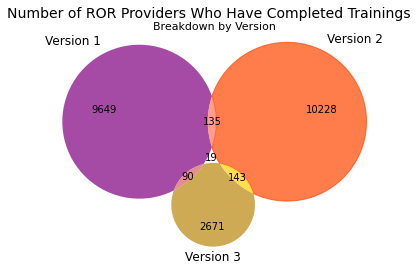

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from matplotlib_venn import venn3, venn3_circles
from collections import Counter

from matplotlib.pyplot import figure

figure(figsize=(14, 6))

plt.figure()

sets = Counter()
sets['100'] = count_version_1
sets['001'] = count_version_3
sets['010'] = count_version_2
sets['110'] = count_version_1_and_2
sets['101'] = count_version_1_and_3
sets['011'] = count_version_2_and_3
sets['111'] = count_version_1_and_2_and_3
setLabels = ['set1', 'set2', 'set3']
plt.suptitle("Number of ROR Providers Who Have Completed Trainings", fontsize=14)
plt.title("Breakdown by Version", fontsize=11)
v = venn3(normalize_to = 10, subsets = (sets), set_labels = ("Version 1", "Version 2", "Version 3"), set_colors=("purple", "orange", "darkgoldenrod"), alpha=0.7)
v.get_patch_by_id('010').set_color('orangered')

fig1 = plt.gcf()
plt.show()
fig1.savefig('Provider_Training_By_Version.pdf')
files.download('Provider_Training_By_Version.pdf')


In [ ]:
training_status_df = df['Training Status'].value_counts().rename_axis('Training Status').reset_index(name='Count of Contact ID')
training_status_df.to_excel(writer, sheet_name = "Training Status - Summary") 

In [ ]:
training_status_df.head()

,Training Status,Count of Contact ID
0,Completed,22935
1,Not started,6244
2,In Progress,1062


In [ ]:
training_by_state_df = pd.crosstab(df['State'], df['Training Status'])

total_sum_by_state = (training_by_state_df['Completed'] + training_by_state_df['In Progress'] + training_by_state_df['Not started']  )

## ADD PERCENT COLUMNS
training_by_state_df['% Completed'] = training_by_state_df['Completed'] / total_sum_by_state
training_by_state_df['% In Progress'] = training_by_state_df['In Progress'] / total_sum_by_state
training_by_state_df['% Not started'] = training_by_state_df['Not started'] / total_sum_by_state

training_by_state_df["Total Number of Providers"] = training_by_state_df[['Completed', 'In Progress', 'Not started']].sum(axis=1)

training_by_state_df.to_excel(writer, sheet_name = "Training by State") 

In [ ]:
training_by_state_df.head()

Training Status,Completed,In Progress,Not started,% Completed,% In Progress,% Not started,Total Number of Providers
State,,,,,,,
AE,1,0,0,1.000000,0.000000,0.000000,1
AK,55,0,3,0.948276,0.000000,0.051724,58
AL,83,5,33,0.685950,0.041322,0.272727,121
AP,0,0,1,0.000000,0.000000,1.000000,1
AR,28,1,56,0.329412,0.011765,0.658824,85


In [ ]:
training_by_affiliate_df = pd.crosstab(df['Affiliate Name'], df['Training Status'])



total_sum_by_affiliate = (training_by_affiliate_df['Completed'] + training_by_affiliate_df['In Progress'] + training_by_affiliate_df['Not started']  )

training_by_affiliate_df['% Completed'] = training_by_affiliate_df['Completed'] / total_sum_by_affiliate
training_by_affiliate_df['% In Progress'] = training_by_affiliate_df['In Progress'] / total_sum_by_affiliate
training_by_affiliate_df['% Not started'] = training_by_affiliate_df['Not started'] / total_sum_by_affiliate

training_by_affiliate_df["Total Number of Providers"] = training_by_affiliate_df[['Completed', 'In Progress', 'Not started']].sum(axis=1)

training_by_affiliate_df.to_excel(writer, sheet_name = "Training by Affiliate") 

In [ ]:
training_by_affiliate_df.head()

Training Status,Completed,In Progress,Not started,% Completed,% In Progress,% Not started,Total Number of Providers
Affiliate Name,,,,,,,
Delaware (TIROS 1),17,2,66,0.200000,0.023529,0.776471,85
Independent / International,2362,172,1246,0.624868,0.045503,0.329630,3780
PA (excluding Greater Philadelphia),662,25,146,0.794718,0.030012,0.175270,833
Reach Out and Read Alabama,202,7,49,0.782946,0.027132,0.189922,258
Reach Out and Read Arizona,483,31,180,0.695965,0.044669,0.259366,694


In [ ]:
writer.save()
files.download('Prog_Contacts.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>